## **Lab Assignment 4 Lab Hours**

### **1. Image Quantization (Uniform):**

In [76]:
import cv2
import PIL
import numpy as np
import math
import matplotlib.pyplot as plt
from PIL import Image
from skimage import io, color

In [77]:
img=cv2.imread("einstein.jpg")
images=[]
def quantizer(img,L):
    h,w,c=img.shape
    Q=np.zeros((256,))
    y=np.zeros((h,w))
    B=256
    q=B/L
    for i in range(0,255):
        Q[i+1]=math.floor(i/q)*q+(q/2)
    for i in range(1,h):
        for j in range(1,w):
            y[i][j]=Q[img[i][j]][1]
    images.append(y)
    plt.figure()
    plt.imshow(y,cmap="gray")
    plt.show()

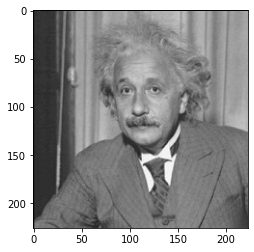

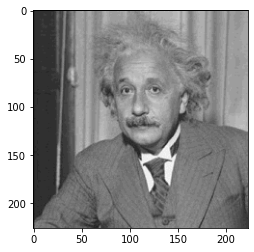

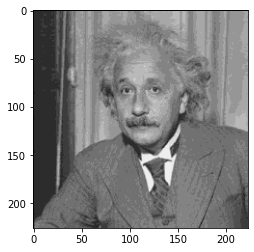

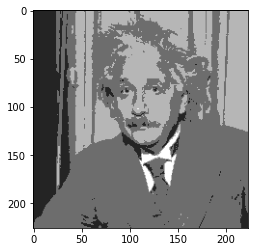

In [78]:
img_64 = quantizer(img,64)
img_32 = quantizer(img,32)
img_16 = quantizer(img,16)
img_4 = quantizer(img,4)

## Image Quantization using inbuilt function

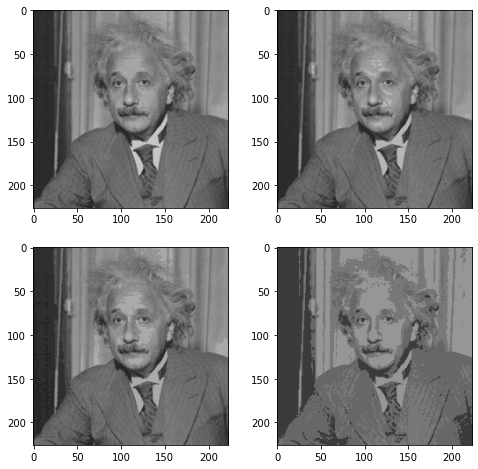

In [79]:
img = Image.open("einstein.jpg")
images=[]
images.append(img.quantize(colors=64))
images.append(img.quantize(colors=32))
images.append(img.quantize(colors=16))
images.append(img.quantize(colors=4))

fig=plt.figure(figsize=(8, 8))
for i in range(1, 4 +1):
    fig.add_subplot(2, 2, i)
    plt.imshow(images[i-1])
plt.show()

### **Mean Squared Error**

In [80]:
mean_squared_error = []
L = [64,32,16,4]
img=cv2.imread("einstein.jpg")
ii = color.rgb2gray(img)
for i in range(len(L)):
    mean_squared_error.append(np.square(np.subtract(ii,(np.asarray(images[i]))).mean()))
print(mean_squared_error)

[926.7553699149496, 214.96409398973896, 47.74696238164473, 1.0864801233675934]


## **2. Distance Measures:**


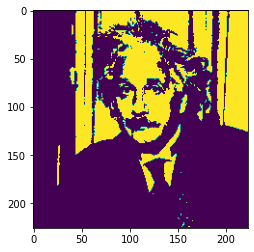

In [91]:
img=cv2.imread("einstein.jpg")
h,w,c=img.shape
y=np.zeros((h,w))
for i in range(1,h):
  for j in range(1,w):
    if(img[i][j][1] >= 127):
      y[i][j] = 1;
    else:
      y[i][j] = 0;
  plt.imshow(y)
  
    

In [93]:
img=cv2.imread("einstein.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
r ,y = cv2.threshold(img,127,255,cv2.THRESH_BINARY)


a) Euclidean distance

In [100]:
dst_euc = cv2.distanceTransform(y,cv2.DIST_L1, 3)
dst_euc

array([[ 0.,  0.,  0., ..., 17., 18., 19.],
       [ 0.,  0.,  0., ..., 17., 18., 19.],
       [ 0.,  0.,  0., ..., 17., 18., 19.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

b) City- block distance

In [101]:
dst_cb = cv2.distanceTransform(bw_img,cv2.DIST_L2, 3)
dst_cb

array([[ 0.      ,  0.      ,  0.      , ..., 16.235031, 17.190033,
        18.145035],
       [ 0.      ,  0.      ,  0.      , ..., 16.235031, 17.190033,
        18.145035],
       [ 0.      ,  0.      ,  0.      , ..., 16.235031, 17.190033,
        18.145035],
       ...,
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ]], dtype=float32)

c) Chessboard distance

In [102]:
dst_chess = cv2.distanceTransform(bw_img,cv2.DIST_C, 3)
dst_chess

array([[ 0.,  0.,  0., ..., 17., 18., 19.],
       [ 0.,  0.,  0., ..., 17., 18., 19.],
       [ 0.,  0.,  0., ..., 17., 18., 19.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)